# Census Income Project

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dipesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Pre Processing

In [3]:
#checking the shape of dataset
df.shape

(32560, 15)

In [4]:
# reading each column
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#checking nulls present in dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
# checking the datatypes of each column
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [9]:
#  check  the duplicate again
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [10]:
# again checking the data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
# checking the shape of dataset
df.shape

(32536, 15)

## EDA and Visualization

In [12]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

********************
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

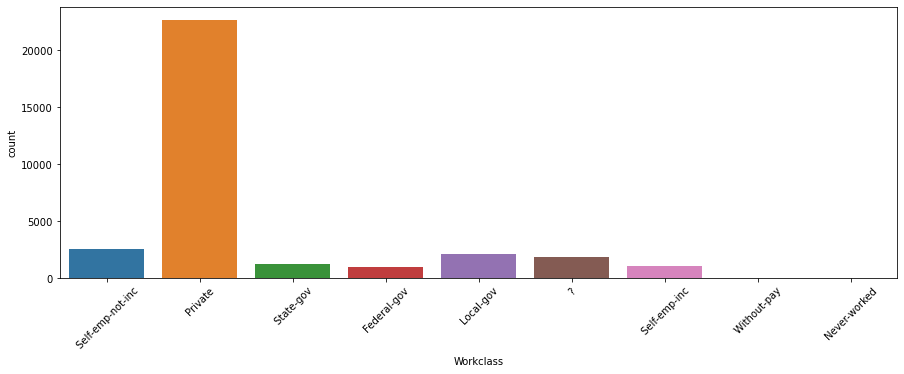

In [13]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Workclass', data = df)
print('*'*20)
print(df.Workclass.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the count plot, we observe the work class of people is high from private and followed by self-employed and local government.

In [14]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

********************
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

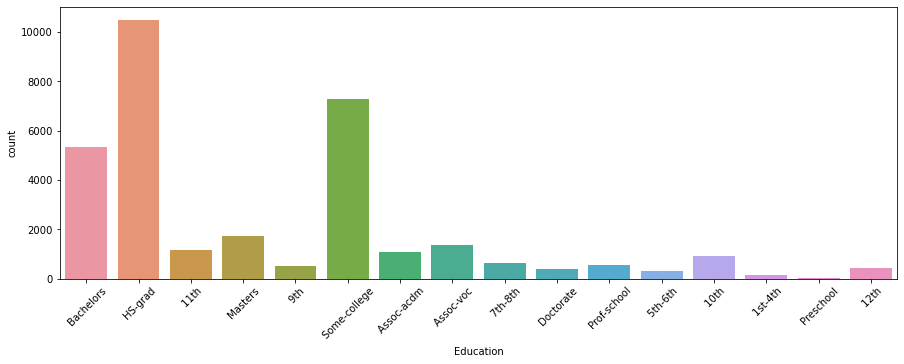

In [15]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Education', data = df)
print('*'*20)
print(df.Education.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## The education of people is mostly High-graduate, followed by college students followed by bachelor's degrees. and we also see some people do not complete their school as we see some count from 1th to 10th standard.

In [16]:
df.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

********************
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

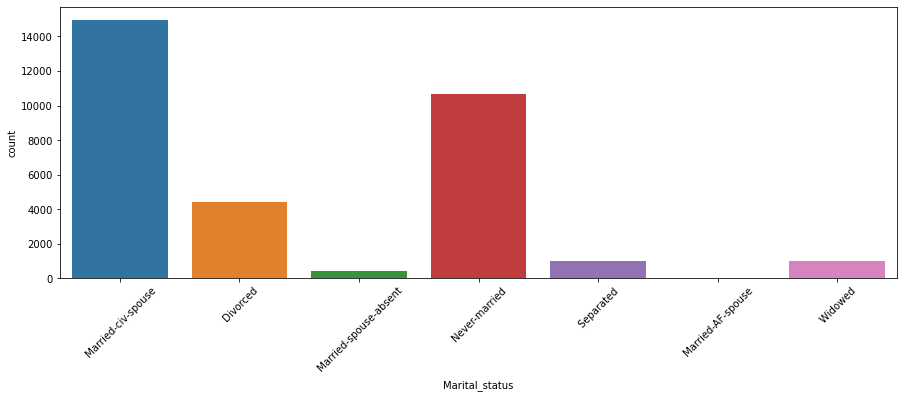

In [17]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Marital_status', data = df)
print('*'*20)
print(df.Marital_status.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## The martial status of the people is mostly married-civ-spouse followed by single and followed by Divorced, we see very less count in widowed and separated.

In [18]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

********************
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64
********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

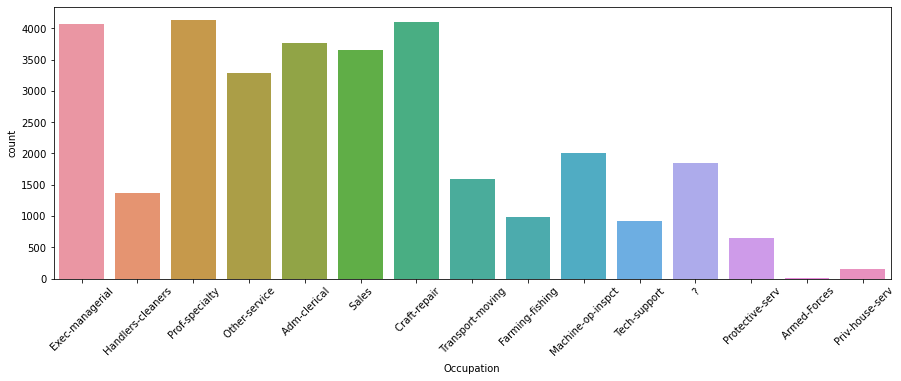

In [19]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Occupation', data = df)
print('*'*20)
print(df.Occupation.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the graph we observe the occupation of people, the people's maximum professions are Prof-specialty, Craft-repair, Exec-managerial and least is Armed-forces.

In [20]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

********************
 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
********************


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

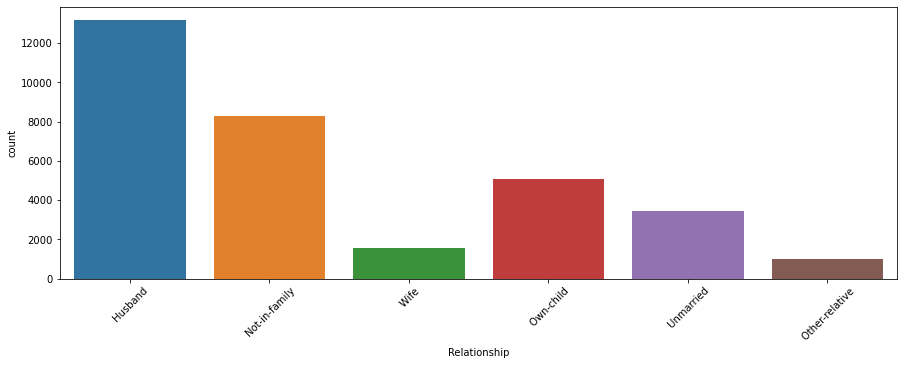

In [21]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Relationship', data = df)
print('*'*20)
print(df.Relationship.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

In [22]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

********************
 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64
********************


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

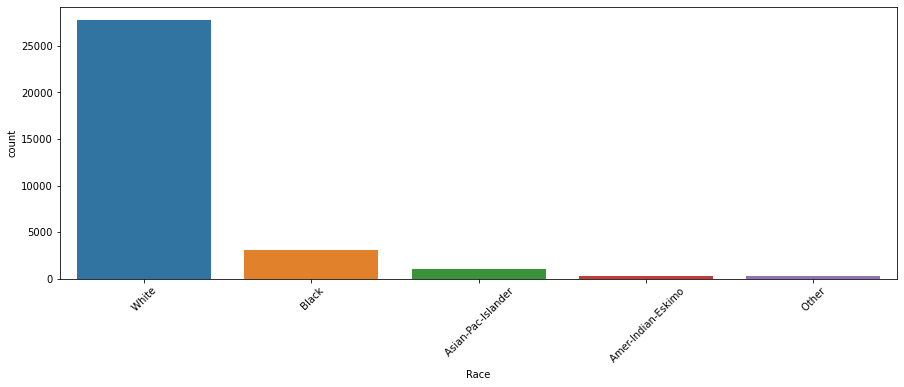

In [23]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Race', data = df)
print('*'*20)
print(df.Race.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## We observe White People are more as compare to other people.

In [24]:
df.Sex.unique()

array([' Male', ' Female'], dtype=object)

********************
 Male      21774
 Female    10762
Name: Sex, dtype: int64
********************


(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

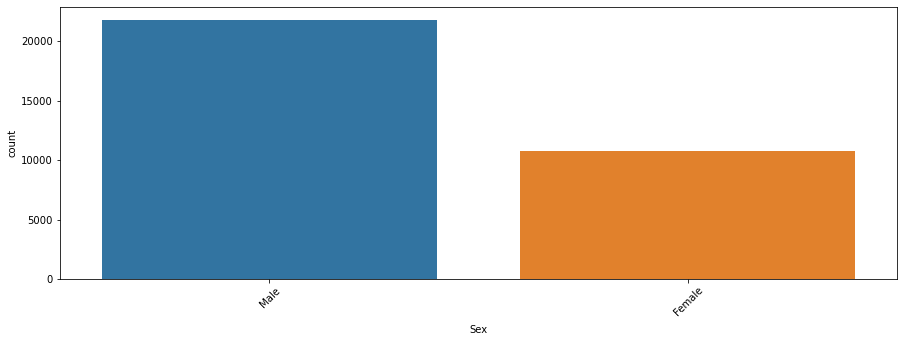

In [25]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Sex', data = df)
print('*'*20)
print(df.Sex.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the countplot  we obsere male are more than female in given dataset

In [26]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

********************
 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru            

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

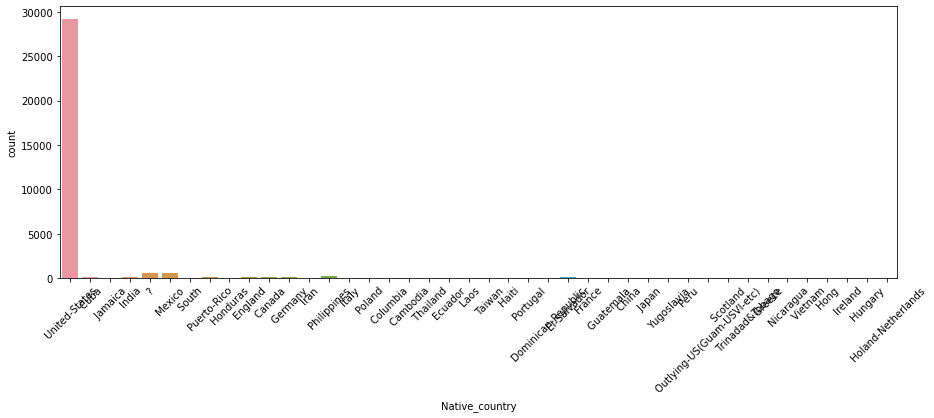

In [27]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Native_country', data = df)
print('*'*20)
print(df.Native_country.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## People from United State are more in the given dataset

In [28]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

********************
 <=50K    24697
 >50K      7839
Name: Income, dtype: int64
********************


(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

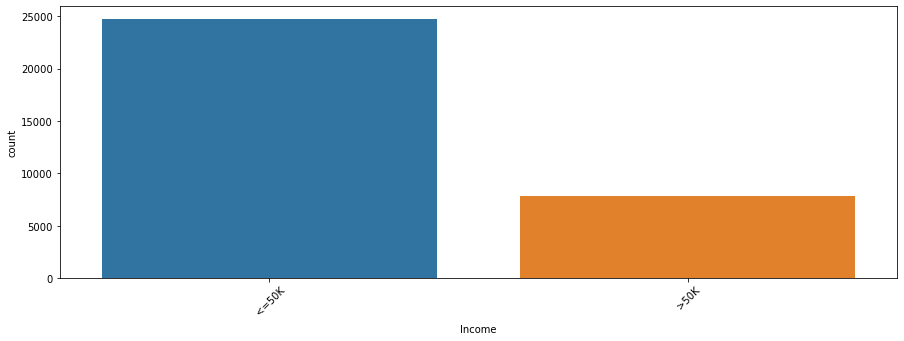

In [29]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Income', data = df)
print('*'*20)
print(df.Income.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

## From the countplot we observe more than 65% of people cannot get Income more than 50K and from this we observe that our target varable is im-balance.

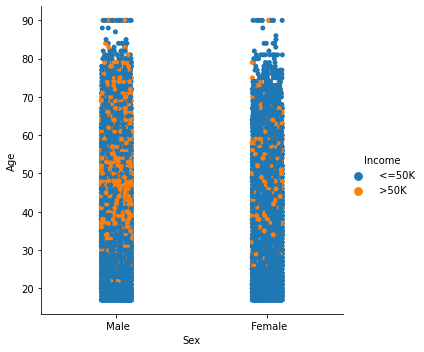

In [30]:
sns.catplot(x = 'Sex' , y = 'Age' , data = df ,hue = 'Income')
plt.show()

##  From the cat-plot, we observe people age range from 40 to 50 and above they most likely to get paid high (greater than 50k).

In [31]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
df1=le.fit_transform(df['Income'])
pd.Series(df1)

0        0
1        0
2        0
3        0
4        0
        ..
32531    0
32532    1
32533    0
32534    0
32535    1
Length: 32536, dtype: int32

In [34]:
df['Income']=df1

In [35]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 15))

       Sex    Income
1     Male  0.305869
0   Female  0.109552


 Male      21774
 Female    10762
Name: Sex, dtype: int64




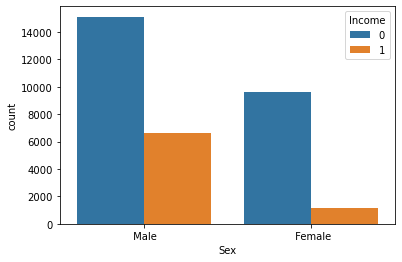

<Figure size 1080x1080 with 0 Axes>

In [36]:
graphs('Sex','Income',df)

## From the graph, we observe that from all males only 30.5% of males are getting more than 50k income and in females, almost 11% of females are getting income more than 50k in income.

In [37]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [38]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

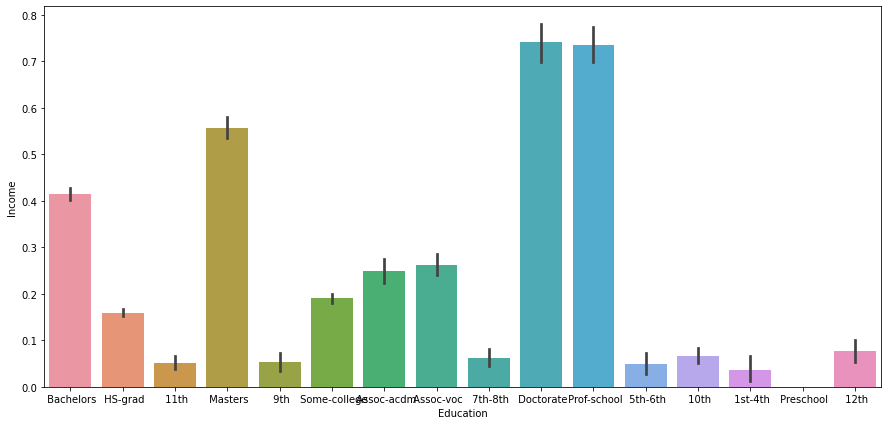

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Education',y = 'Income',data = df)

plt.show()

## From the graph, we observe Doctorate, Pre-school, master, and bachelor's are having a high income.

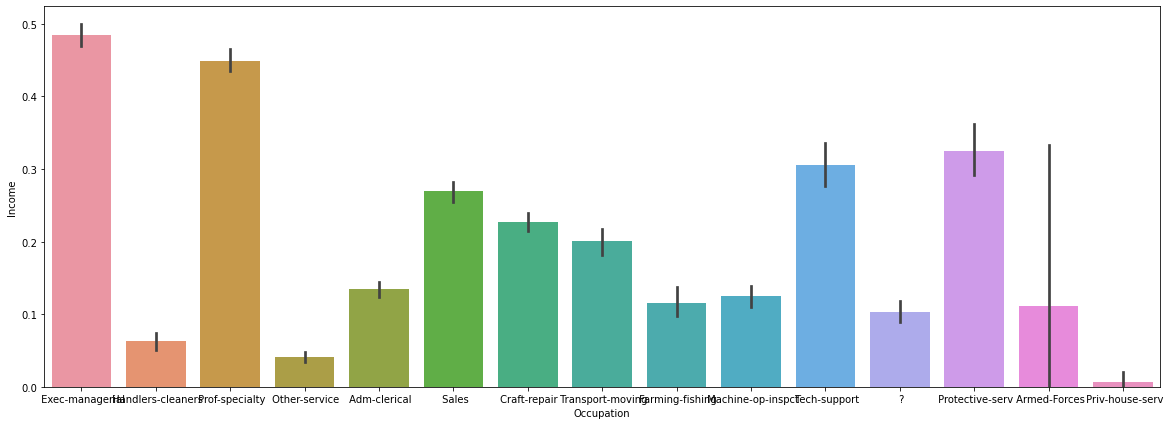

In [40]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Occupation',y = 'Income',data = df)

plt.show()

## From Occupation wise Exec-manager, Prof-speciality,tech-support is having a high income.

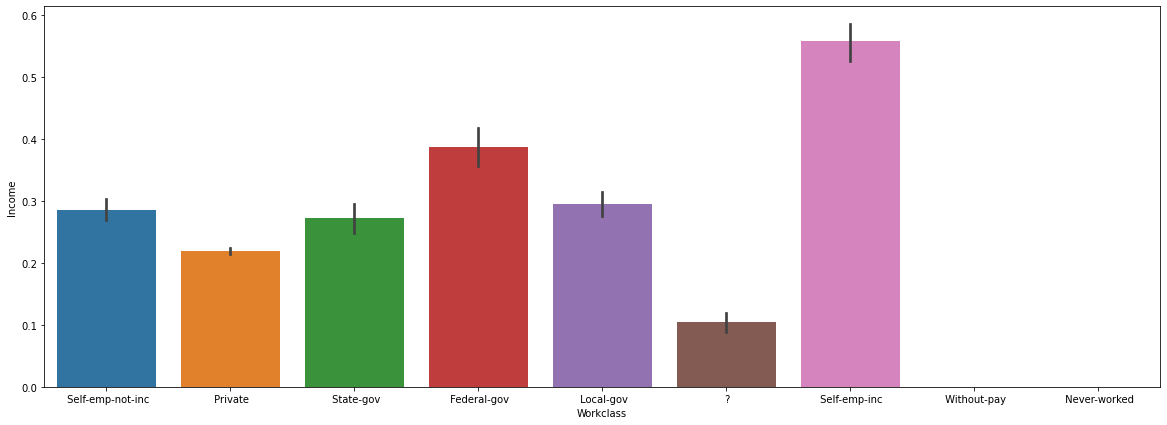

In [41]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Workclass',y = 'Income',data = df)

plt.show()

## From Graph work-class wise if you are having self business and working in Federal Government then your income is high.

In [42]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int32
dtype: object

## Applying Label Encoder to categorical columns

In [43]:
df.Income.value_counts() / len(df.Income)

0    0.759067
1    0.240933
Name: Income, dtype: float64

In [44]:
df2=le.fit_transform(df['Workclass'])
pd.Series(df1)
df['Workclass']=df2

In [45]:
df3=le.fit_transform(df['Education'])
pd.Series(df1)
df['Education']=df3

In [46]:
df4=le.fit_transform(df['Marital_status'])
pd.Series(df1)
df['Marital_status']=df4

In [47]:
df5=le.fit_transform(df['Occupation'])
pd.Series(df1)
df['Occupation']=df5

In [48]:
df6=le.fit_transform(df['Relationship'])
pd.Series(df1)
df['Relationship']=df6

In [49]:
df7=le.fit_transform(df['Race'])
pd.Series(df1)
df['Race']=df7

In [50]:
df8=le.fit_transform(df['Sex'])
pd.Series(df1)
df['Sex']=df8

In [51]:
df9=le.fit_transform(df['Native_country'])
pd.Series(df1)
df['Native_country']=df9

In [52]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

## Splitting the label and feature to apply SMOTE

In [53]:
# seperate label n feature
X=df.drop('Income' , axis=1)
y=df.Income

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [56]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 18540, 1: 5862})

## Import SMOTE

In [57]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [58]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 18540, 1: 5862})
the number of classes after fit:  Counter({0: 18540, 1: 13905})


In [59]:
df.Capital_gain.value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [60]:
df.Capital_loss.value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [61]:
#describe dataset
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Observations
   There is no null values
   
   we have remove the duplicates
   
   the row count is now after removing duplicate is 32536 and 15 columns
   
   we will drop Fnlwgt
   
   in capital loss and captial gain we see problem in that as std is greater than mean

## Plotting the heatmap to observe Co-relation

In [63]:
corr=df.corr()
corr.shape

(15, 15)

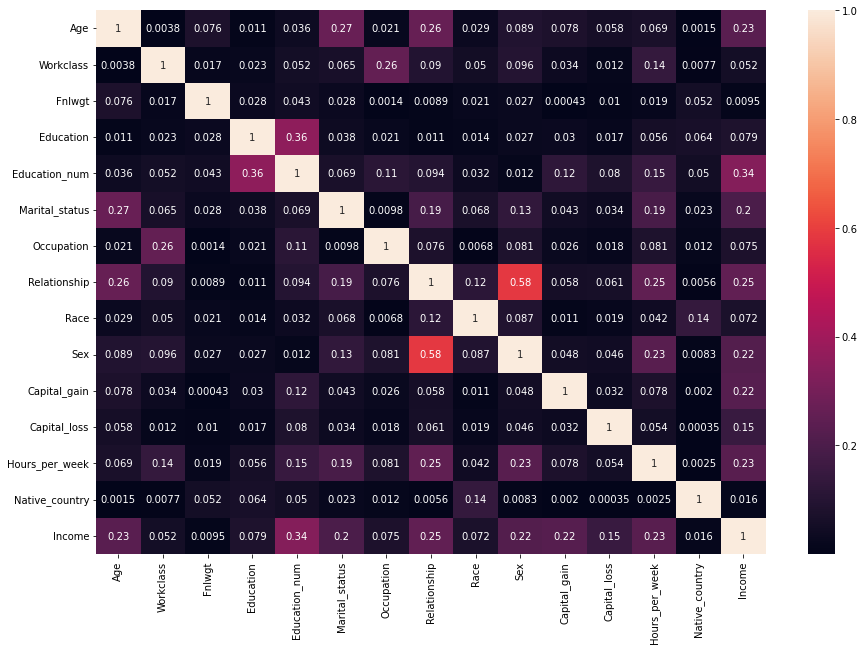

In [64]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

## From the heatmap, we observe that All the features contribute very small to predict the target variable and we observe sex vs relationship there is a 58% relationship which is ok and we don't we any multi-collinearity problem exists.

## Plotting Histogram plot to see how data is distributed on an interval scale.

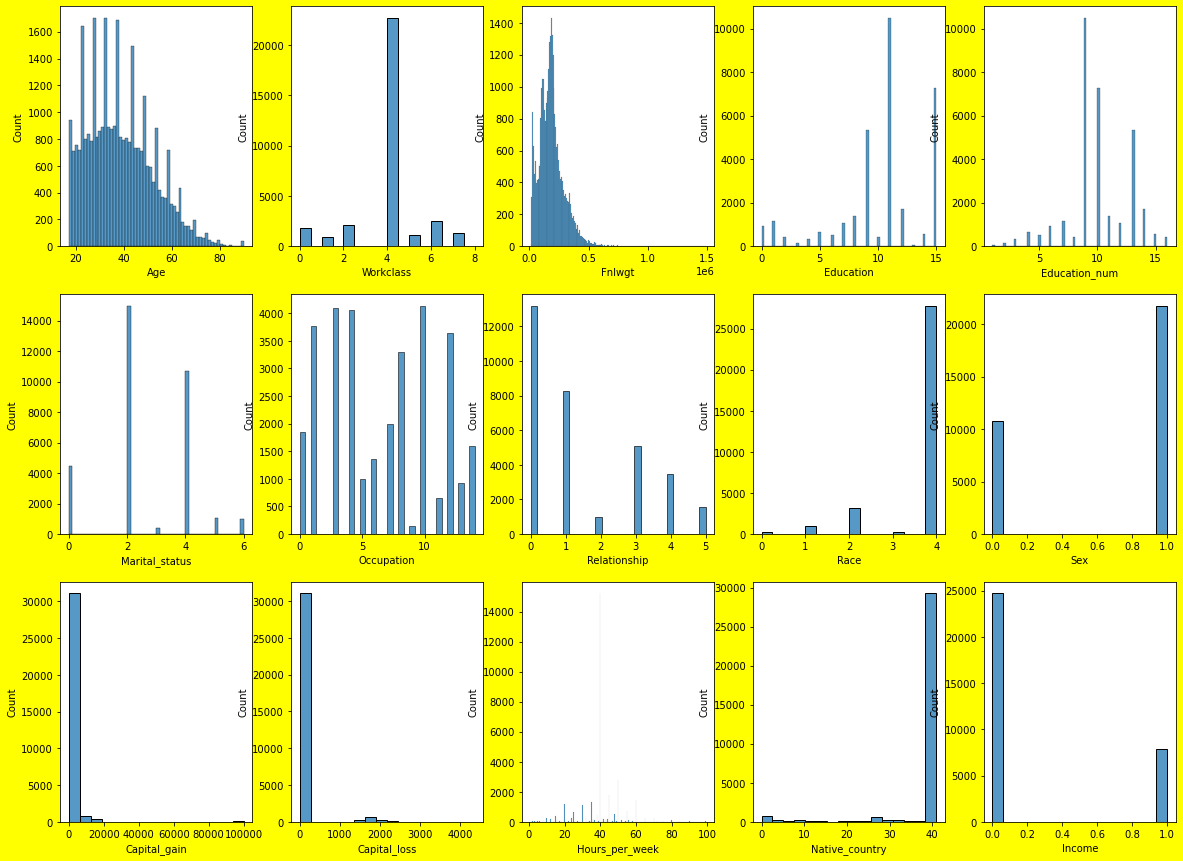

In [65]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed 

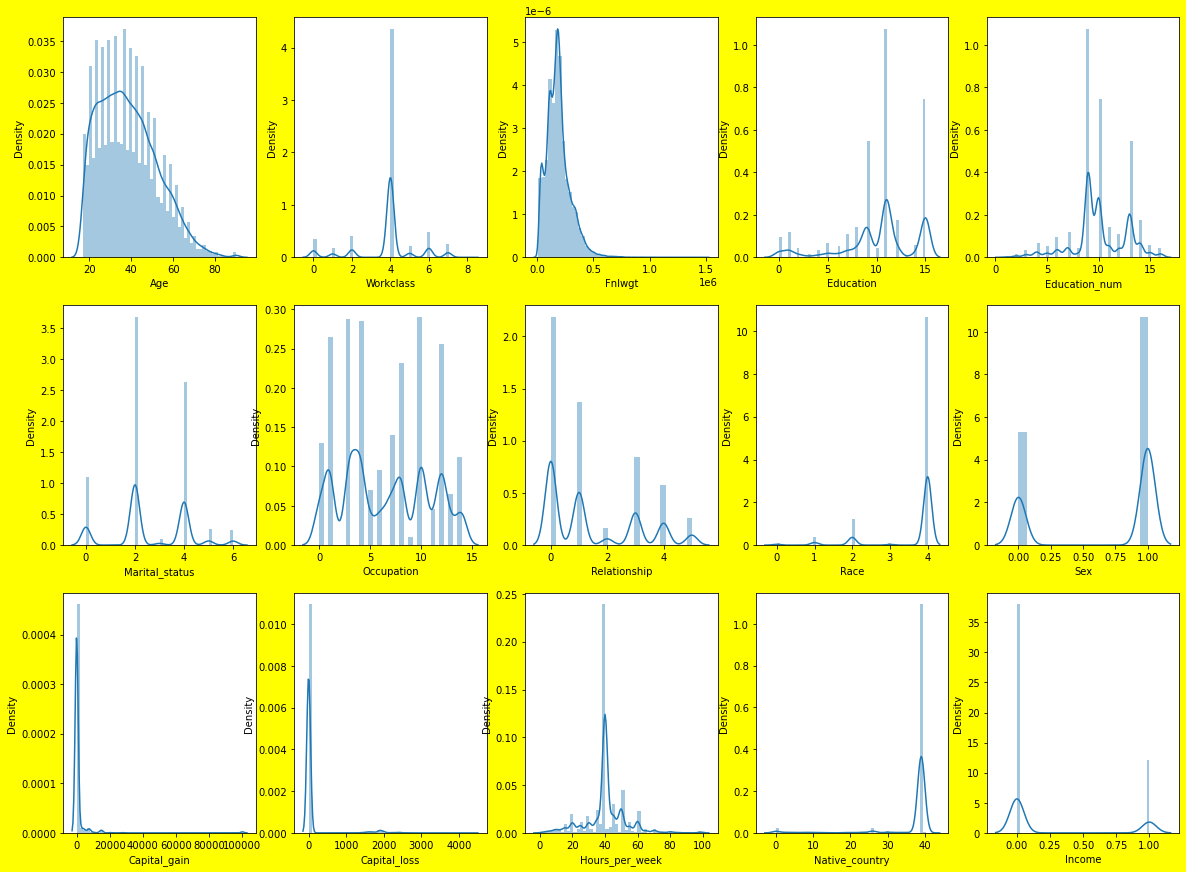

In [66]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From Histogram and Distribution Graph we see a small amount of skewness in age and education number and we observe a large amount of skewness in capital gain and capital loss and hours per week.

In [68]:
X = df.drop(['Income'],axis = 1)
y = df['Income']

## Plotting Scatter plot to see realtion between feature and label

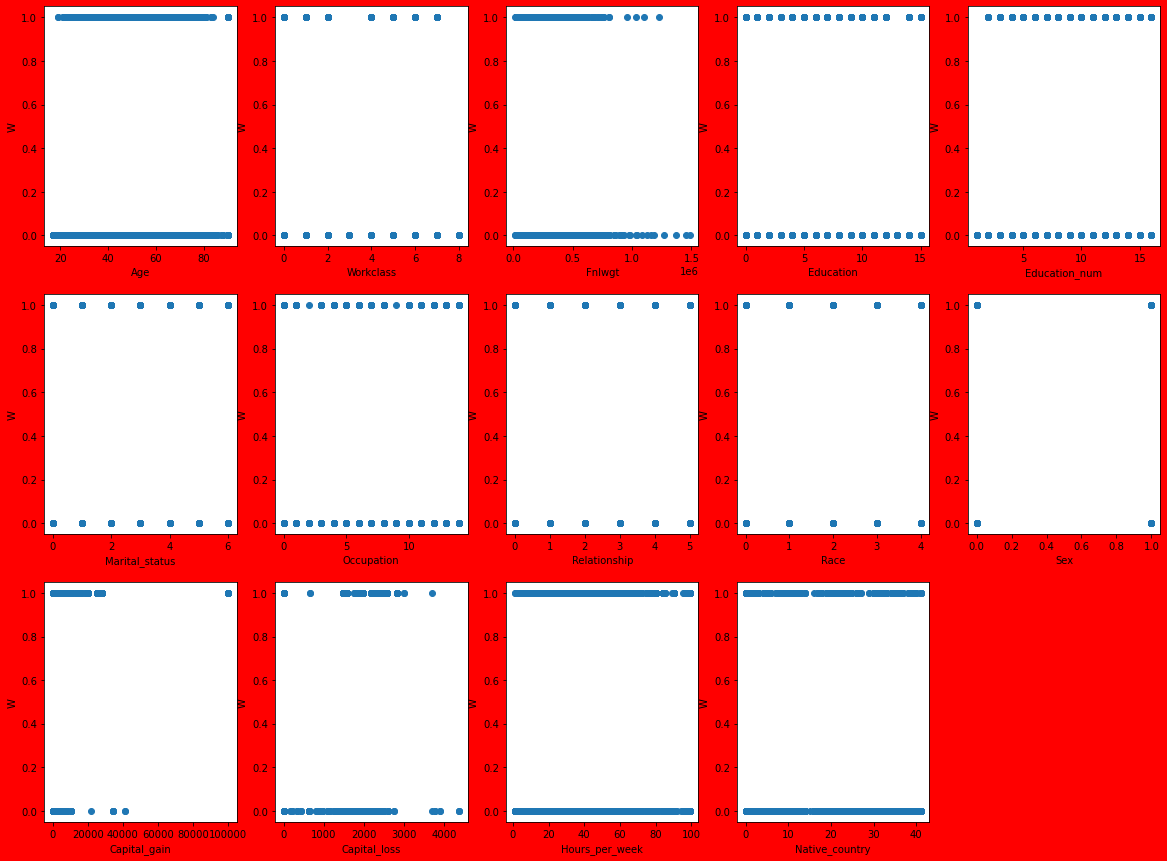

In [69]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

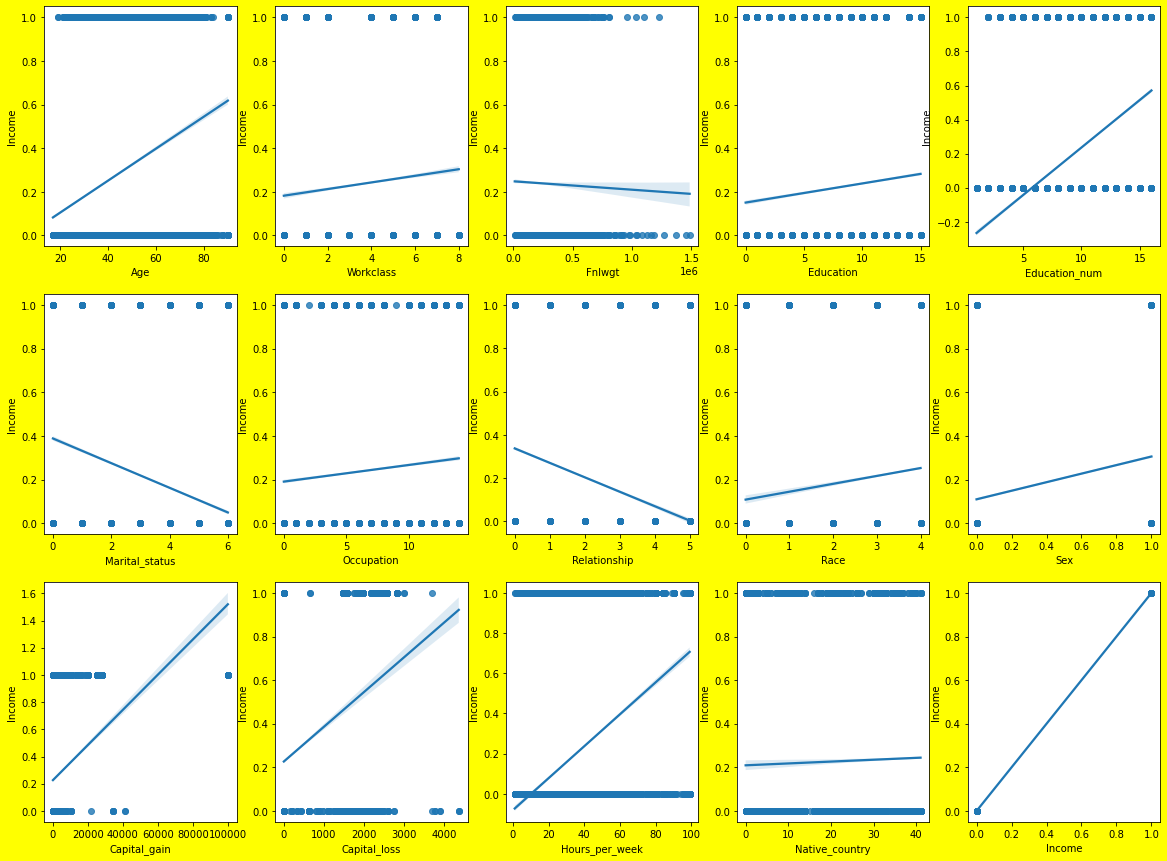

In [70]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the Scatter plot and regression plot, we observe positive relationships with our target variable in almost all the features except Marital status, a Relationship which is negatively correlated to our target variable, and FNlwgt we are going to delete that column in the furthor step.

## Plotting Box plot to see outliers are present are not

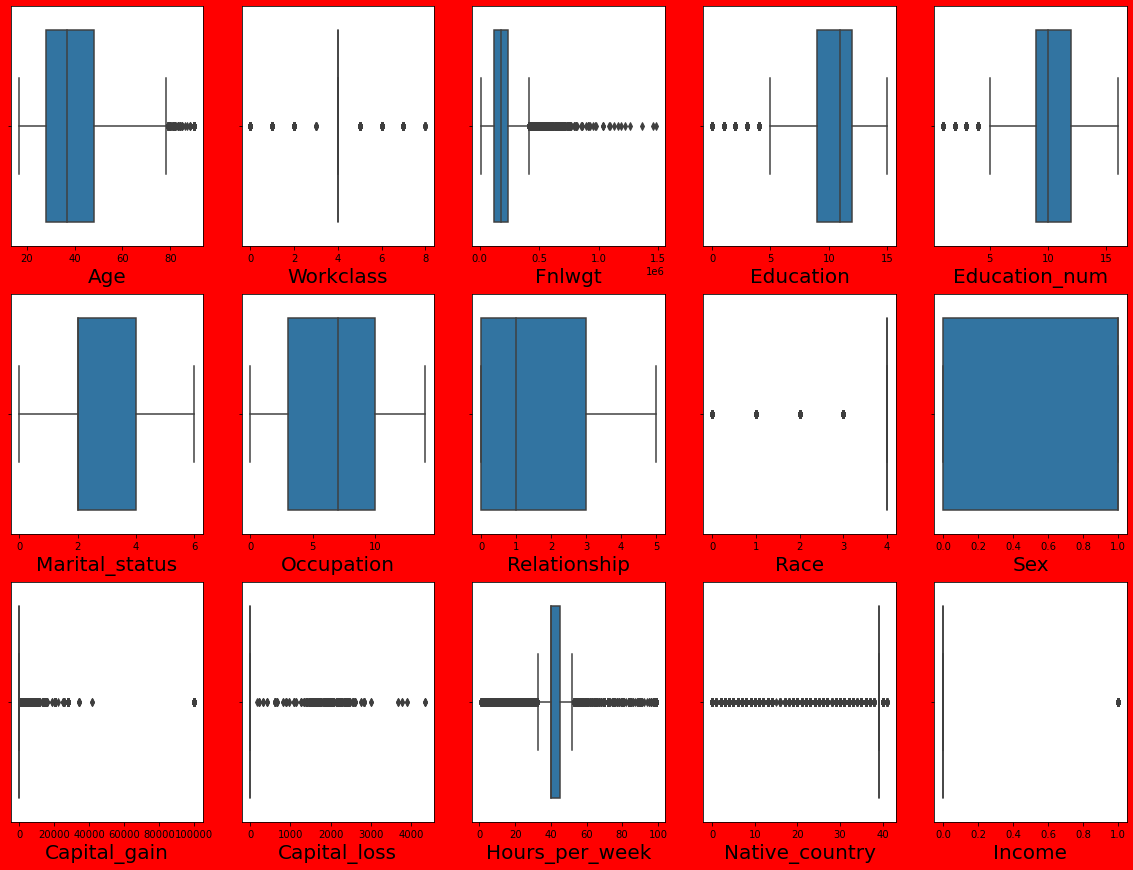

In [71]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 15:
        plt.subplot (3,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From the boxplot, we observe a large number of outliers and we are going to treat outliers with the IQR method.

In [72]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

Age                   20.00
Workclass              0.00
Fnlwgt            119161.75
Education              3.00
Education_num          3.00
Marital_status         2.00
Occupation             7.00
Relationship           3.00
Race                   0.00
Sex                    1.00
Capital_gain           0.00
Capital_loss           0.00
Hours_per_week         5.00
Native_country         0.00
Income                 0.00
dtype: float64

In [73]:
#validating outlier 
preg_high = (q3.Age + (1.5*iqr.Age))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Age']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32390,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32391,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32392,32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [74]:
#validating outlier 
preg_high = (q3.Hours_per_week + (1.5*iqr.Hours_per_week))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Hours_per_week']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28907,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
28908,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
28909,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
28910,32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [75]:
#validating outlier 
preg_high = (q3.Capital_gain + (1.5*iqr.Capital_gain))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Capital_gain']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26647,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
26648,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
26649,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
26650,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [76]:
#validating outlier 
preg_high = (q3.Capital_loss + (1.5*iqr.Capital_loss))
preg_high
# to check how many outliers in preg column 
outlier_high = np.where(df['Capital_loss']>preg_high)
outlier_high
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape
#once you delete you should reset index
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25380,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
25381,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
25382,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
25383,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [77]:
blood_low = (q1.Education - (1.5*iqr.Education))
blood_low

outlier_low = np.where(df['Education']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22749,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
22750,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
22751,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
22752,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [78]:
blood_low = (q1.Education_num - (1.5*iqr.Education_num))
blood_low

outlier_low = np.where(df['Education_num']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
3,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
4,5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
22191,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
22192,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
22193,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [79]:
blood_low = (q1.Race - (1.5*iqr.Race))
blood_low

outlier_low = np.where(df['Race']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
3,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
4,11,23,4,122272,9,13,4,1,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
18778,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
18779,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
18780,32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [80]:
blood_low = (q1.Hours_per_week - (1.5*iqr.Hours_per_week))
blood_low

outlier_low = np.where(df['Hours_per_week']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
2,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
3,15,25,6,176756,11,9,4,5,3,4,1,0,0,35,39,0
4,16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
15399,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
15400,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
15401,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


In [81]:
blood_low = (q1.Native_country - (1.5*iqr.Native_country))
blood_low

outlier_low = np.where(df['Native_country']<blood_low)
outlier_low

df=df.drop(df.index[outlier_low])
df.shape
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
1,4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
2,6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
3,15,25,6,176756,11,9,4,5,3,4,1,0,0,35,39,0
4,16,32,4,186824,11,9,4,7,4,4,1,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14374,32553,53,4,321865,12,14,2,4,0,4,1,0,0,40,39,1
14375,32554,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
14376,32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
14377,32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1


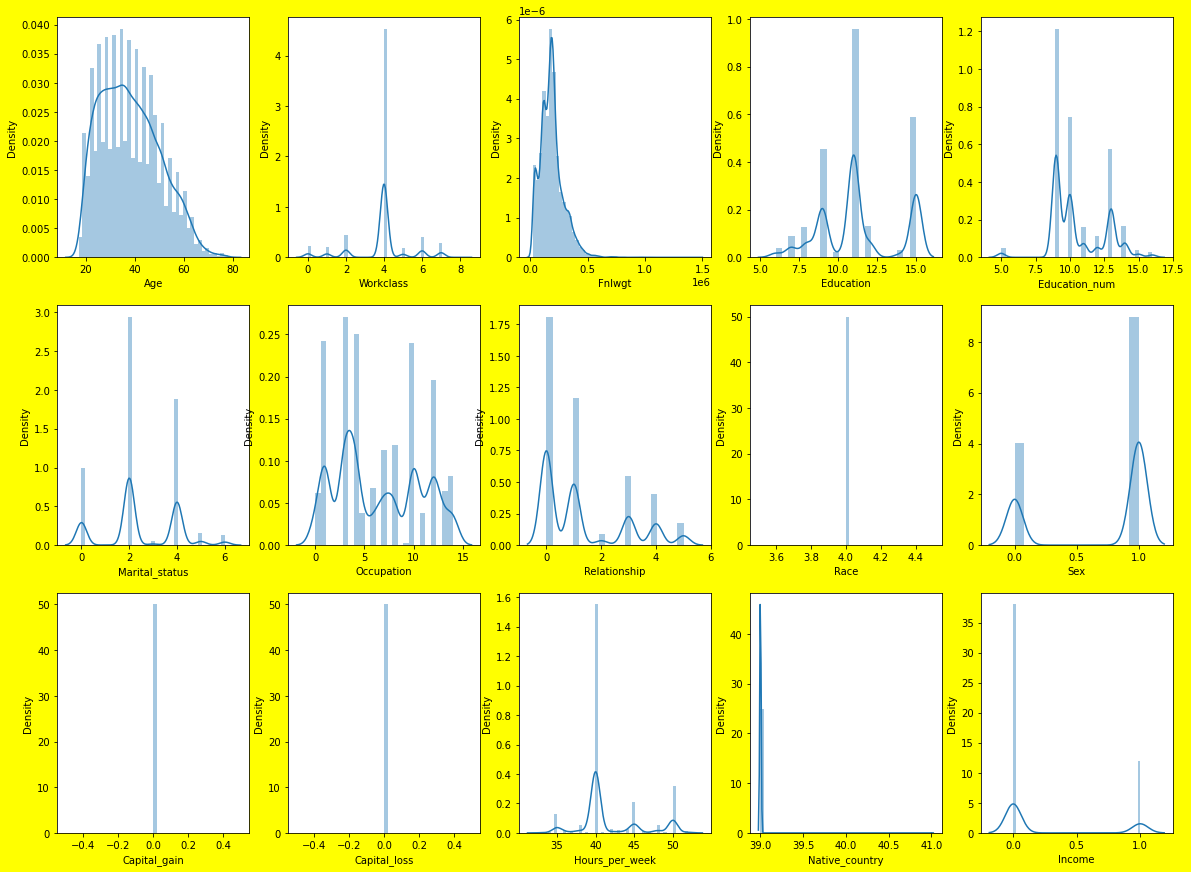

In [82]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting distribution plot again to observe the distribution after removing the outliers.

## finding correlation between feature and lable using CORR method

In [83]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('Income' , axis =1 ).corrwith (df.Income)

Age               0.258007
Workclass         0.006769
Fnlwgt            0.013531
Education        -0.049025
Education_num     0.276199
Marital_status   -0.154615
Occupation        0.075939
Relationship     -0.231880
Race                   NaN
Sex               0.205373
Capital_gain           NaN
Capital_loss           NaN
Hours_per_week    0.166076
Native_country    0.002199
dtype: float64

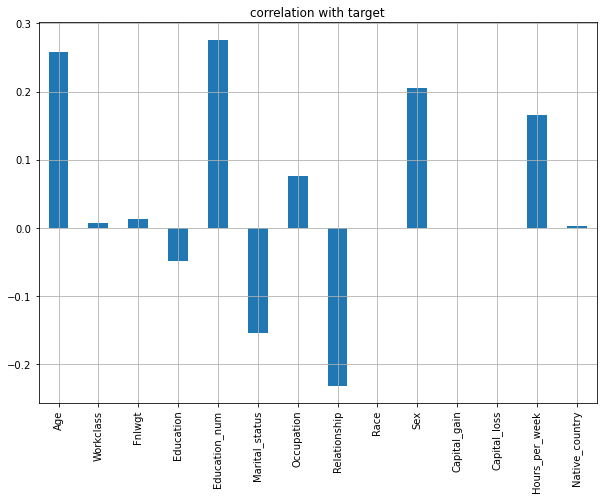

In [84]:
# convert above numbers into graph for better understanding
df.drop('Income' , axis = 1).corrwith (df.Income).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

## From the above graph Age, Education-num, Occupation, Sex, Hours-per-week, Work class, and Native-country are positively Co-related to our target variable while Education, Maritial-status and relationship are negatively co-related to our target variable.

### Dropping unwanted columns

In [86]:
df.drop(['Fnlwgt','Capital_gain', 'Capital_loss','Race'],axis=1,inplace = True)

In [88]:
X = df.drop(['Income'],axis = 1)
y = df['Income']

In [89]:
X

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Native_country
1,38,4,11,9,0,6,1,1,40,39
4,37,4,12,14,2,4,5,0,40,39
6,52,6,11,9,2,4,0,1,45,39
15,25,6,11,9,4,5,3,1,35,39
16,32,4,11,9,4,7,4,1,40,39
...,...,...,...,...,...,...,...,...,...,...
32553,53,4,12,14,2,4,0,1,40,39
32554,22,4,15,10,4,11,1,1,40,39
32555,27,4,7,12,2,13,5,0,38,39
32556,40,4,11,9,2,7,0,1,40,39


### Scaling the data

In [90]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

### Checking for the multicollinearity Using VIF

In [91]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.153423,Age
1,1.037093,Workclass
2,1.047653,Education
3,1.088705,Education_num
4,1.111101,Marital_status
5,1.068867,Occupation
6,1.566553,Relationship
7,1.497698,Sex
8,1.065719,Hours_per_week
9,1.000381,Native_country


# DecisionTreeClassifier Model

In [92]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Finding the best Random state

In [93]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7596662030598053 RandomState 1


MAXINING TESTING SCORE 0.7596662030598053 ON RANDOM STATE OF 1
Testing Accuracy 0.7769123783031989 RandomState 2


MAXINING TESTING SCORE 0.7769123783031989 ON RANDOM STATE OF 2
Testing Accuracy 0.7630041724617525 RandomState 3


Testing Accuracy 0.7566063977746871 RandomState 4


Testing Accuracy 0.7632823365785814 RandomState 5


Testing Accuracy 0.7655076495132128 RandomState 6


Testing Accuracy 0.7599443671766342 RandomState 7


Testing Accuracy 0.7557719054242003 RandomState 8


Testing Accuracy 0.7618915159944367 RandomState 9


Testing Accuracy 0.7641168289290682 RandomState 10


Testing Accuracy 0.7610570236439499 RandomState 11


Testing Accuracy 0.7752433936022253 RandomState 12


Testing Accuracy 0.7652294853963839 RandomState 13


Testing Accuracy 0.7702364394993045 RandomState 14


Testing Accuracy 0.7674547983310153 RandomState 15


Testing Accuracy 0.7680111265646732 RandomState 16


Testing Accuracy 0.7671766342141864

In [94]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7833101529902643 On Random State 22


### Training the model

In [95]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=22)

In [96]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [97]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [98]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.669510%
====Testing Score====
Accuracy score : 77.913769%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.86      0.86      2778
           1       0.51      0.50      0.51       817

    accuracy                           0.78      3595
   macro avg       0.68      0.68      0.68      3595
weighted avg       0.78      0.78      0.78      3595



## Model Score
* Training Score = 95.669510%
* Testing Score = 77.913769%

## Hyperparameter For DecisionTree Classifier

In [99]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [100]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [101]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [102]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [103]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [104]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.277819%
====Testing Score====
Accuracy score : 81.223922%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.94      0.89      2778
           1       0.65      0.37      0.48       817

    accuracy                           0.81      3595
   macro avg       0.74      0.66      0.68      3595
weighted avg       0.79      0.81      0.79      3595



## Model Scores With Hyperparameter Tuning
* Training Score = 81.277819%
* Testing Score = 81.223922%

## Confusion Matrix DecisionTree Classifier

In [154]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2658,  129],
       [ 518,  290]], dtype=int64)

# RandomForest Classifier Model

In [105]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [106]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7936022253129347 RandomState 1


MAXINING TESTING SCORE 0.7936022253129347 ON RANDOM STATE OF 1
Testing Accuracy 0.8083449235048679 RandomState 2


MAXINING TESTING SCORE 0.8083449235048679 ON RANDOM STATE OF 2
Testing Accuracy 0.7944367176634214 RandomState 3


Testing Accuracy 0.7849791376912378 RandomState 4


Testing Accuracy 0.7947148817802503 RandomState 5


Testing Accuracy 0.795827538247566 RandomState 6


Testing Accuracy 0.7933240611961057 RandomState 7


Testing Accuracy 0.799721835883171 RandomState 8


Testing Accuracy 0.7933240611961057 RandomState 9


Testing Accuracy 0.7891515994436717 RandomState 10


Testing Accuracy 0.8011126564673157 RandomState 11


Testing Accuracy 0.7910987482614743 RandomState 12


Testing Accuracy 0.7927677329624478 RandomState 13


Testing Accuracy 0.8025034770514604 RandomState 14


Testing Accuracy 0.79221140472879 RandomState 15


Testing Accuracy 0.8005563282336579 RandomState 16


Testing Accuracy 0.79221140472879 Rando

In [107]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8083449235048679 On Random State 2


### Training the model

In [108]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=71)

In [109]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [110]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [111]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 95.660237%
====Testing Score====
Accuracy score : 80.611961%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.89      0.87      2720
           1       0.62      0.54      0.57       875

    accuracy                           0.81      3595
   macro avg       0.74      0.71      0.72      3595
weighted avg       0.80      0.81      0.80      3595



## Model Scores 
* Training Score = 95.660237%
* Testing Score = 80.611961%

## Hyperparameter For RandomForestClassifier

In [112]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [113]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [114]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [115]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 4}


In [116]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 25, min_samples_leaf= 8, min_samples_split= 7,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=4)

In [117]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 83.586795%
====Testing Score====
Accuracy score : 82.392211%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.86      0.92      0.89      2720
           1       0.68      0.52      0.59       875

    accuracy                           0.82      3595
   macro avg       0.77      0.72      0.74      3595
weighted avg       0.81      0.82      0.82      3595



## Model Scores With Hyperparameter Tuning
* Training Score = 83.586795%
* Testing Score = 82.392211%

## Confusion Matrix RandomForestClassifier

In [155]:
### if you want to check confusion matrix

y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2663,  124],
       [ 165,  643]], dtype=int64)

# Support Vector Machine Model

In [118]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

### Finding the best random state

In [119]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.811404728789986 RandomState 1


MAXINING TESTING SCORE 0.811404728789986 ON RANDOM STATE OF 1
Testing Accuracy 0.811404728789986 RandomState 2


Testing Accuracy 0.8161335187760779 RandomState 3


MAXINING TESTING SCORE 0.8161335187760779 ON RANDOM STATE OF 3
Testing Accuracy 0.8052851182197497 RandomState 4


Testing Accuracy 0.8216968011126564 RandomState 5


MAXINING TESTING SCORE 0.8216968011126564 ON RANDOM STATE OF 5
Testing Accuracy 0.8086230876216968 RandomState 6


Testing Accuracy 0.8089012517385258 RandomState 7


Testing Accuracy 0.8164116828929068 RandomState 8


Testing Accuracy 0.8083449235048679 RandomState 9


Testing Accuracy 0.8191933240611962 RandomState 10


Testing Accuracy 0.8116828929068151 RandomState 11


Testing Accuracy 0.8133518776077886 RandomState 12


Testing Accuracy 0.8139082058414464 RandomState 13


Testing Accuracy 0.8250347705146036 RandomState 14


MAXINING TESTING SCORE 0.8250347705146036 ON RANDOM STATE OF 14
Testing Accuracy 

In [120]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8280945757997218 On Random State 33


### training the data

In [121]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=33)

In [122]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [123]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [124]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.361276%
====Testing Score====
Accuracy score : 82.809458%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.94      0.89      2754
           1       0.71      0.45      0.55       841

    accuracy                           0.83      3595
   macro avg       0.78      0.70      0.72      3595
weighted avg       0.82      0.83      0.81      3595



## Model Scores 
* Training Score = 81.361276%
* Testing Score = 82.809458%

## Hyperparameter Tuning for SVC

In [125]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [126]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [127]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [128]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [129]:
#best parameters
gridsearch.best_params_

{'C': 10, 'gamma': 0.02}

In [130]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [131]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.175816%
====Testing Score====
Accuracy score : 82.892907%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.85      0.94      0.89      2754
           1       0.71      0.46      0.56       841

    accuracy                           0.83      3595
   macro avg       0.78      0.70      0.73      3595
weighted avg       0.82      0.83      0.82      3595



## Model Scores With Hyperparameter Tuning
* Training Score = 81.175816%
* Testing Score = 82.892907%

## Confusion Matrix for SVC

In [156]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2608,  179],
       [ 472,  336]], dtype=int64)

# KNeighborsClassifier Model

In [132]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [133]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8286509040333797 RandomState 1


MAXINING TESTING SCORE 0.8286509040333797 ON RANDOM STATE OF 1
Testing Accuracy 0.8350486787204451 RandomState 2


MAXINING TESTING SCORE 0.8350486787204451 ON RANDOM STATE OF 2
Testing Accuracy 0.8331015299026425 RandomState 3


Testing Accuracy 0.8230876216968012 RandomState 4


Testing Accuracy 0.8339360222531293 RandomState 5


Testing Accuracy 0.8328233657858136 RandomState 6


Testing Accuracy 0.827538247566064 RandomState 7


Testing Accuracy 0.8311543810848401 RandomState 8


Testing Accuracy 0.8283727399165508 RandomState 9


Testing Accuracy 0.8311543810848401 RandomState 10


Testing Accuracy 0.8381084840055633 RandomState 11


MAXINING TESTING SCORE 0.8381084840055633 ON RANDOM STATE OF 11
Testing Accuracy 0.8305980528511822 RandomState 12


Testing Accuracy 0.8294853963838665 RandomState 13


Testing Accuracy 0.8400556328233658 RandomState 14


MAXINING TESTING SCORE 0.8400556328233658 ON RANDOM STATE OF 14
Testing Accura

In [134]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8445062586926286 ON RANDOM STATE OF 57


### training the model

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=83)

In [136]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [137]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [138]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 85.367211%
====Testing Score====
Accuracy score : 80.305981%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.88      0.87      2787
           1       0.57      0.53      0.55       808

    accuracy                           0.80      3595
   macro avg       0.72      0.71      0.71      3595
weighted avg       0.80      0.80      0.80      3595



## Model Scores 
* Training Score = 85.367211%
* Testing Score = 80.305981%

## Hyperparameter For KNeighborsClassifier

In [139]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [140]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [141]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [142]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [143]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 11)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [144]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 83.456973%
====Testing Score====
Accuracy score : 81.001391%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.89      0.88      2787
           1       0.58      0.54      0.56       808

    accuracy                           0.81      3595
   macro avg       0.73      0.71      0.72      3595
weighted avg       0.81      0.81      0.81      3595



## Model Scores With Hyperparameter Tuning
* Training Score = 83.456973%
* Testing Score = 81.001391%

## Confusion Matric for KNN

In [157]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[2474,  313],
       [ 370,  438]], dtype=int64)

#  Plot AUC-ROC curve for above 4-Models

In [145]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

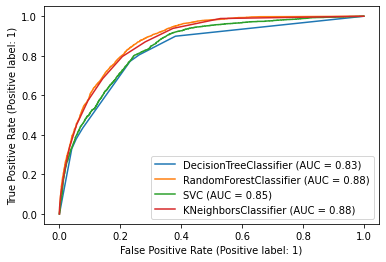

In [146]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data

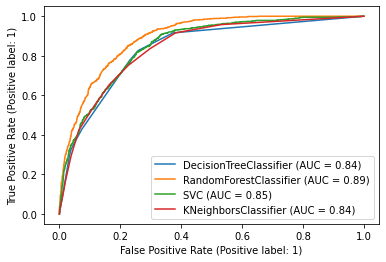

In [147]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [148]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [149]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 25, min_samples_leaf= 8, min_samples_split= 7,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=25, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=4)

In [150]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [151]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 11)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

##  AUC-ROC Curve for Training Data With Hyperparameter tuning

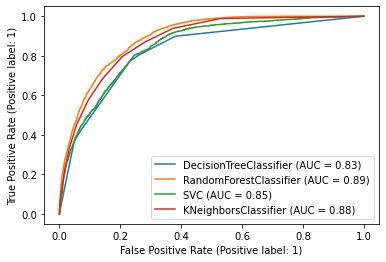

In [152]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data With Hyperparameter Tuning

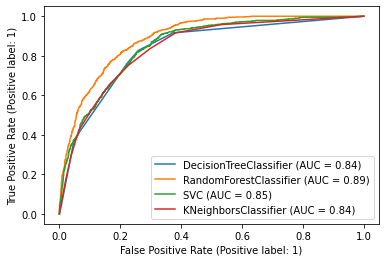

In [153]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## For this particular model According to the AUC-ROC curve with hyperparameter tuning Random Forest is the best Model as the training score with hyperparameter is 89% and the testing score is 89% so we select Random Forest as the best model for this particular model.

# Saving the Model

In [158]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))